In [479]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

In [480]:
import sklearn

In [481]:
input_data = Path('../Shakin/data/raw/Summary_of_Weather.csv')

In [482]:
df = pd.read_csv(input_data)
df1=pd.read_csv("../Shakin/data/raw/Weather_Station_Locations.csv")

C:\Users\Levi\AppData\Local\Temp\ipykernel_6480\1349712525.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_data)


In [483]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110707 entries, 0 to 110706
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          110707 non-null  int64  
 1   Date         110707 non-null  object 
 2   Precip       110707 non-null  object 
 3   WindGustSpd  495 non-null     float64
 4   MaxTemp      110707 non-null  float64
 5   MinTemp      110707 non-null  float64
 6   MeanTemp     110707 non-null  float64
 7   Snowfall     109640 non-null  object 
 8   PoorWeather  31850 non-null   object 
 9   YR           110707 non-null  int64  
 10  MO           110707 non-null  int64  
 11  DA           110707 non-null  int64  
 12  PRCP         108914 non-null  object 
 13  DR           496 non-null     float64
 14  SPD          495 non-null     float64
 15  MAX          110263 non-null  float64
 16  MIN          110272 non-null  float64
 17  MEA          110243 non-null  float64
 18  SNF          109640 non-

In [485]:
df.drop(columns=['WindGustSpd','FT','FB','FTI','ITH','PGT','SD3','RHX','RHN','DR','SPD','SND','RVG','WTE','TSHDSBRSGF', 'PoorWeather','MAX','MIN','MEA'], inplace=True)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110707 entries, 0 to 110706
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       110707 non-null  int64  
 1   Date      110707 non-null  object 
 2   Precip    110707 non-null  object 
 3   MaxTemp   110707 non-null  float64
 4   MinTemp   110707 non-null  float64
 5   MeanTemp  110707 non-null  float64
 6   Snowfall  109640 non-null  object 
 7   YR        110707 non-null  int64  
 8   MO        110707 non-null  int64  
 9   DA        110707 non-null  int64  
 10  PRCP      108914 non-null  object 
 11  SNF       109640 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 10.1+ MB


In [487]:
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1067
YR             0
MO             0
DA             0
PRCP        1793
SNF         1067
dtype: int64

In [488]:
df.STA=pd.Categorical(df.STA)
df=df.assign(STA=df.STA.cat.codes)
# df.MaxTemp=pd.Categorical(df.MaxTemp)
# df=df.assign(MaxTemp=df.MaxTemp.cat.codes)
# df.MinTemp=pd.Categorical(df.MinTemp)
# df=df.assign(MinTemp=df.MinTemp.cat.codes)
# df.MeanTemp=pd.Categorical(df.MeanTemp)
# df=df.assign(MeanTemp=df.MeanTemp.cat.codes)
# df.YR=pd.Categorical(df.YR)
# df=df.assign(YR=df.YR.cat.codes)
df.MO=pd.Categorical(df.MO)
df=df.assign(MO=df.MO.cat.codes)
df.DA=pd.Categorical(df.DA)
df=df.assign(DA=df.DA.cat.codes)
# df1.NAME = pd.Categorical(df1.NAME)
# df1.assign(NAME=df1.NAME.cat.codes )

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110707 entries, 0 to 110706
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       110707 non-null  int16  
 1   Date      110707 non-null  object 
 2   Precip    110707 non-null  object 
 3   MaxTemp   110707 non-null  float64
 4   MinTemp   110707 non-null  float64
 5   MeanTemp  110707 non-null  float64
 6   Snowfall  109640 non-null  object 
 7   YR        110707 non-null  int64  
 8   MO        110707 non-null  int8   
 9   DA        110707 non-null  int8   
 10  PRCP      108914 non-null  object 
 11  SNF       109640 non-null  object 
dtypes: float64(3), int16(1), int64(1), int8(2), object(5)
memory usage: 8.0+ MB


In [490]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,SNF
0,0,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,6,0,0.04,0.0
1,0,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,6,1,0,0.0
2,0,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,6,2,0.1,0.0
3,0,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,6,3,0.1,0.0
4,0,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,6,4,0,0.0


In [491]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              150 non-null    int64  
 1   NAME              150 non-null    object 
 2   STATE/COUNTRY ID  150 non-null    object 
 3   LAT               150 non-null    object 
 4   LON               150 non-null    object 
 5   ELEV              150 non-null    int64  
 6   Latitude          150 non-null    float64
 7   Longitude         150 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.5+ KB


In [492]:
df1['STATE/COUNTRY ID'].unique()

array(['AL', 'AU', 'AZ', 'BA', 'BE', 'BN', 'BR', 'BZ', 'CS', 'CT', 'CU',
       'DR', 'DY', 'EG', 'EQ', 'ER', 'ET', 'FJ', 'FR', 'GH', 'GL', 'GU',
       'GY', 'HA', 'HI', 'IL', 'IN', 'IQ', 'IR', 'IY', 'JM', 'JP', 'KO',
       'KU', 'LC', 'LI', 'LY', 'MC', 'MT', 'NG', 'NH', 'NI', 'NK', 'OM',
       'PF', 'PH', 'PI', 'PK', 'PM', 'PQ', 'PR', 'SG', 'SO', 'SP', 'TD',
       'TI', 'TO', 'TS', 'TU', 'UK'], dtype=object)

In [493]:
station_location = df1['STATE/COUNTRY ID'].value_counts()[:60]
station_location

IY    13
IN    11
AU     9
PM     7
BZ     7
FR     7
HI     6
AL     5
NG     4
JP     4
MC     4
EG     3
LI     3
TS     3
PK     3
IR     3
GL     3
IL     3
SO     2
OM     2
NI     2
IQ     2
SG     2
CS     2
PH     2
CU     2
PQ     2
PI     2
PF     1
TD     1
MT     1
SP     1
TI     1
TO     1
NK     1
NH     1
PR     1
TU     1
JM     1
LY     1
EQ     1
AZ     1
BA     1
BE     1
BN     1
BR     1
CT     1
DR     1
DY     1
ER     1
LC     1
ET     1
FJ     1
GH     1
GU     1
GY     1
HA     1
KO     1
KU     1
UK     1
Name: STATE/COUNTRY ID, dtype: int64

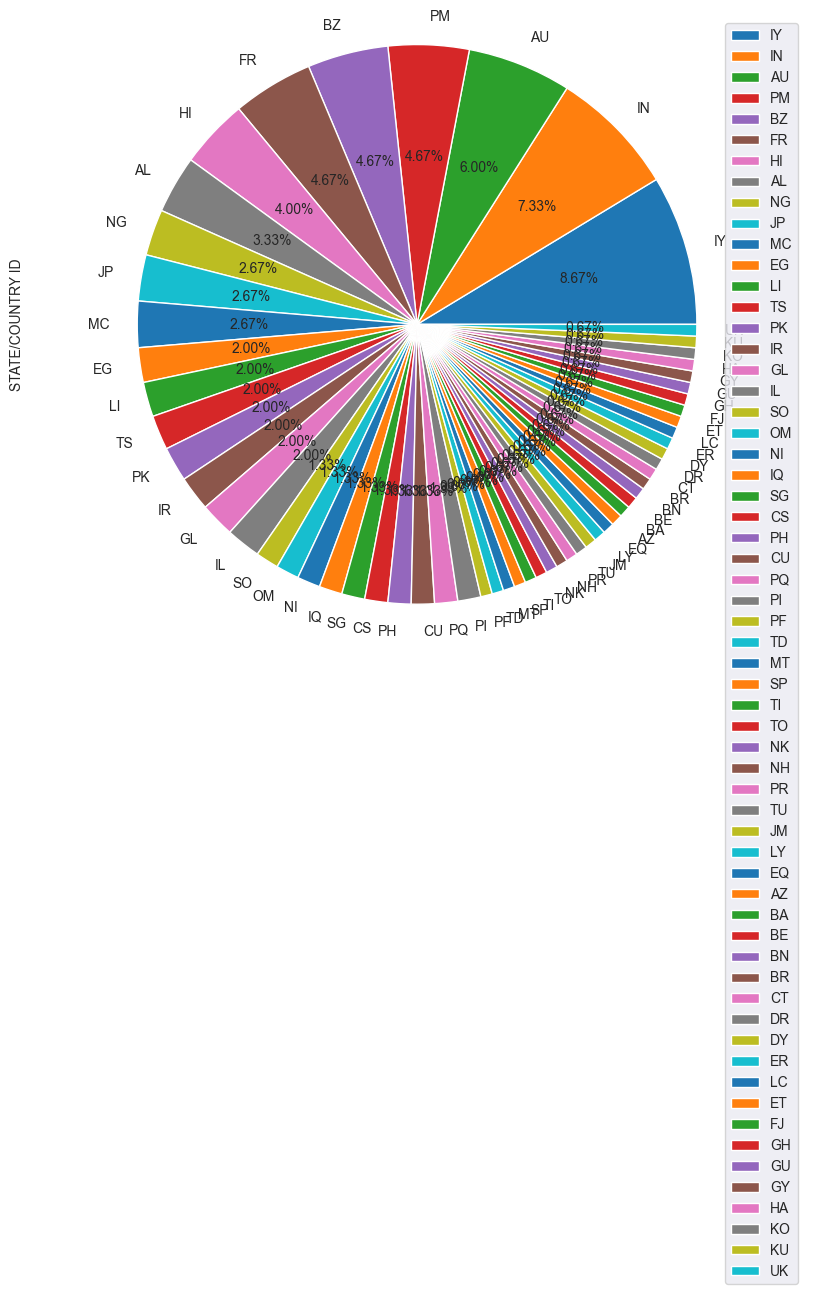

In [494]:
plt.figure(figsize=(10, 8), )
station_location.plot(kind='pie',autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=station_location.index, loc="best")


###### Наибольшее число станций расположены в Италии(13), Индии(11), Австралии(9)

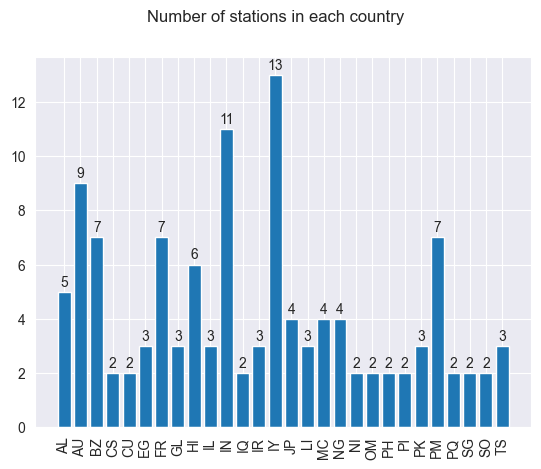

In [495]:
values = []
levels = []
levels_in = df1['STATE/COUNTRY ID'].unique()
for level in levels_in:
    value = df1['STATE/COUNTRY ID'].loc[df1['STATE/COUNTRY ID'] == level].count()
    if value >= 2:
        levels.append(level)
        values.append(value)
bars = plt.bar(levels, values)
plt.xticks(rotation=90)
plt.suptitle('Number of stations in each country')
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.1, value, ha="center", va="bottom"
    )
plt.show()

#### Больше всего станций расположено в Европе и Азии

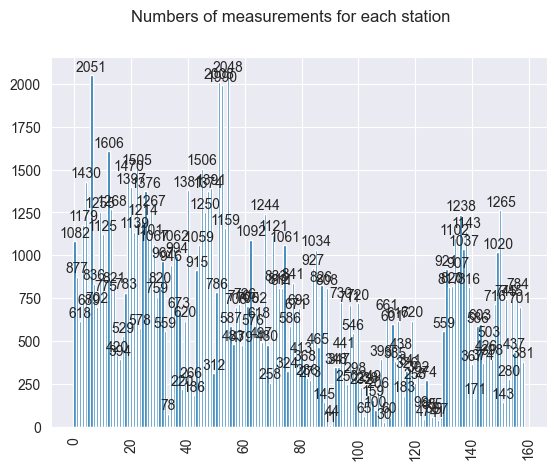

In [496]:
values = []
stations = df['STA'].unique()
for level in df['STA'].unique():
    values.append(df['STA'].loc[df['STA'] == level].count())
bars = plt.bar(stations, values)
plt.xticks(rotation=90)
plt.suptitle('Numbers of measurements for each station')
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, value, ha="center", va="bottom"
    )
plt.show()

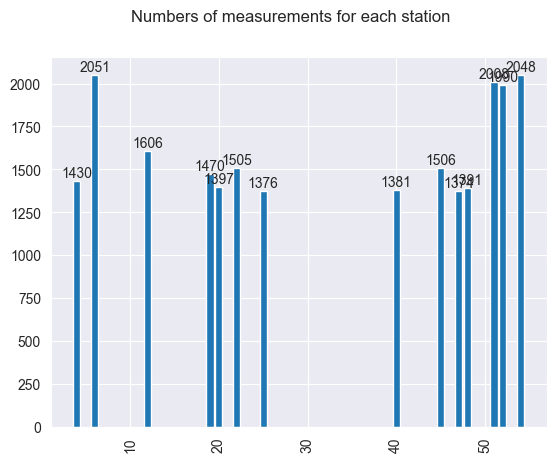

In [497]:
values = []
levels = []
levels_in = df['STA'].unique()
for level in levels_in:
    value = df['STA'].loc[df['STA'] == level].count()
    if value >= 1300:
        levels.append(level)
        values.append(value)
bars = plt.bar(levels, values)
plt.xticks(rotation=90)
plt.suptitle('Numbers of measurements for each station')
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, value, ha="center", va="bottom"
    )
plt.show()

##### The biggest number of measurements is 2051

In [498]:
print("max MaxTemp: ",df['MaxTemp'].max())
print("min MaxTemp: ",df['MaxTemp'].min())
print("max MinTemp: ",df['MinTemp'].max())
print("min MinTemp: ",df['MinTemp'].min())

max MaxTemp:  50.0
min MaxTemp:  -32.77777778
max MinTemp:  34.44444444
min MinTemp:  -37.77777778


Text(0.5, 0.98, 'The most popular maximum temperature')

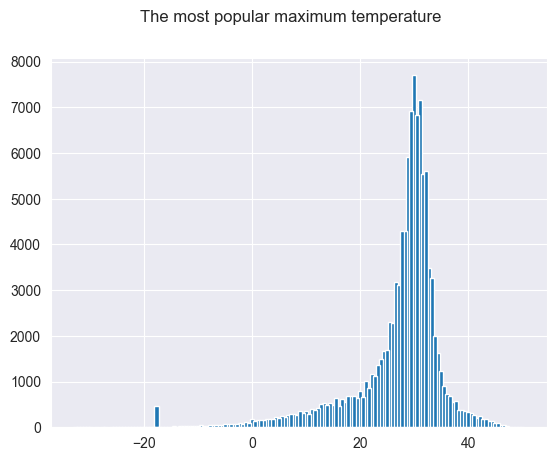

In [499]:
values = []
levels = df['MaxTemp'].unique()
for level in df['MaxTemp'].unique():
    values.append(df['MaxTemp'].loc[df['MaxTemp'] == level].count())
plt.bar(levels, values)
plt.suptitle("The most popular maximum temperature")

#### Наиболее часто регистрируемая максимальная температура составляет 30 градусов

Text(0.5, 0.98, 'The most popular minimum temperature')

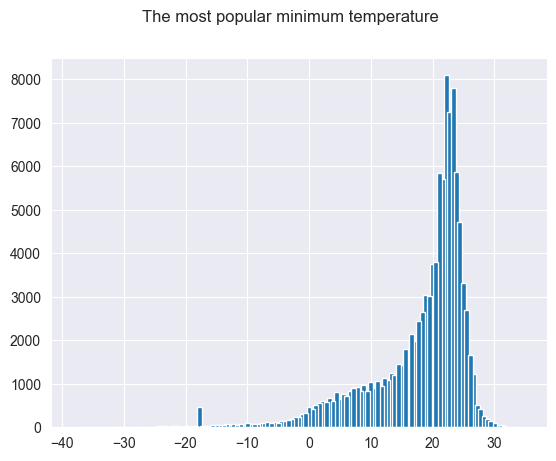

In [510]:
values = []
levels = df['MinTemp'].unique()
for level in df['MinTemp'].unique():
    values.append(df['MinTemp'].loc[df['MinTemp'] == level].count())
plt.bar(levels, values)
plt.suptitle("The most popular minimum temperature")

## Как видно из графиков, разница между наиболее частой минимальной и максимальной температурой несущественна

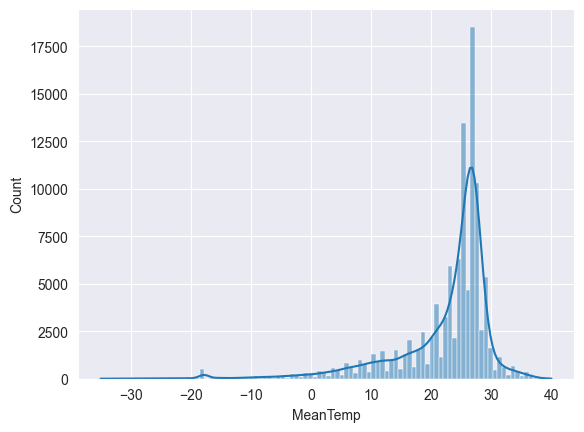

In [500]:
sns.histplot(data=df['MeanTemp'], kde=True, bins=100)
plt.show()

##### Средняя температура варьировалась от минус тридцати до сорока градусов цельсия. Наиболее часто встречалась средняя температура в 27 градусов.

In [501]:
pd.crosstab(df1.WBAN, df.MinTemp)

MinTemp,18.888889,19.444444,20.000000,20.555556,21.111111,21.666667,22.222222,22.777778,23.333333
WBAN,,,,,,,,,
10001,0,0,0,1,0,0,0,0,0
10002,0,0,0,0,1,0,0,0,0
10101,0,0,0,0,0,0,1,0,0
10102,0,0,0,0,0,1,0,0,0
10502,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
82405,0,0,0,0,0,0,1,0,0
82501,0,0,0,0,0,0,0,1,0
82502,0,0,0,0,0,1,0,0,0


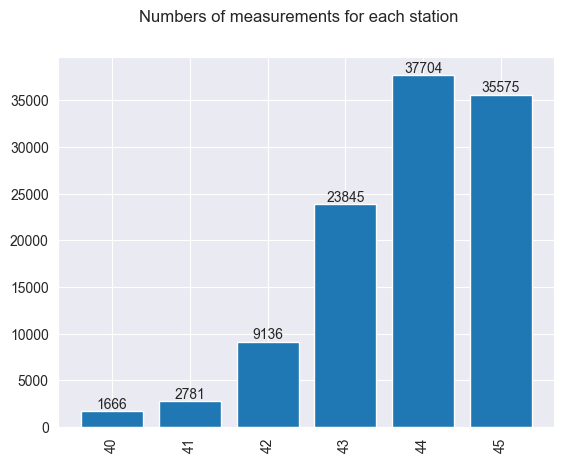

In [514]:
values = []
stations = df['YR'].unique()
for level in df['YR'].unique():
    values.append(df['YR'].loc[df['YR'] == level].count())
bars = plt.bar(stations, values)
plt.xticks(rotation=90)
plt.suptitle('Numbers of measurements for each year ')
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, value, ha="center", va="bottom"
    )
plt.show()

## Вывод: необходимо разбить страны на несколько групп (по регионам), кроме того, можно отсеять года 1941 и 1940, поскольку было проведено крайне малое количество измерений